**Model Selection - Classification using NN**

Model evaluation and selection on a classification task.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, linear, sigmoid


In [3]:
data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\data_w3_ex2.csv",delimiter=',')
print(data.shape)

(200, 3)


In [4]:
x = data[:,:-1]
y = data[:,2]

In [5]:
print(x[:5,:])
print(x.shape)


[[1000.         1457.28643216]
 [1045.22613065 1005.02512563]
 [1090.45226131  854.27135678]
 [1135.67839196 2562.81407035]
 [1180.90452261 4623.11557789]]
(200, 2)


In [6]:
print(y[:5])
print(y.shape)

[0. 0. 0. 0. 0.]
(200,)


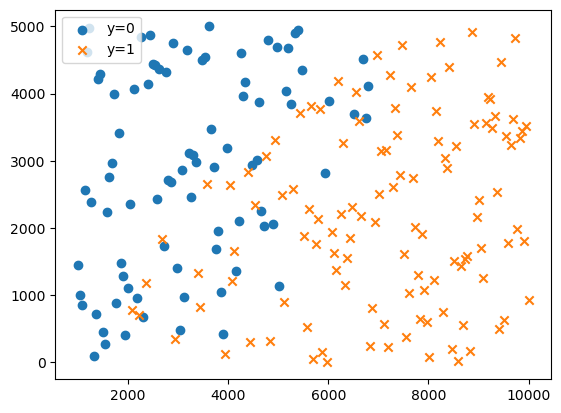

In [7]:
plt.figure()
plt.scatter(x[y==0,0],x[y==0,1],marker='o',label='y=0')
plt.scatter(x[y==1,0],x[y==1,1],marker='x',label='y=1')
plt.legend()
plt.show()

In [8]:
x_train,x_,y_train,y_ = train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=1)
del x_,y_

In [9]:
print(x_train.shape, x_cv.shape, x_test.shape)
print(y_train.shape, y_cv.shape, y_test.shape)

(120, 2) (40, 2) (40, 2)
(120,) (40,) (40,)


In [10]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)


In [11]:
model_1 = Sequential(
    [
        Dense(25,activation='relu'),
        Dense(15,activation='relu'),
        Dense(1,activation='linear')
    ], name = 'model_1'
)

model_2 = Sequential(
    [
        Dense(20, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ], name='model_2'
)

model_3 = Sequential(
    [
        Dense(32, activation = 'relu'),
        Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(1, activation = 'linear')
    ], name = 'model_3'
)

In [12]:
models = [model_1,model_2,model_3]

In [20]:
train_errors = []
cv_errors = []

for model in models:

    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    )

    print(f"Training {model.name}")

    model.fit(x_train_scaled,y_train,epochs=200,verbose=0)

    print("Done")

    treshold = 0.5
    yhat_train = model.predict(x_train_scaled)
    yhat_train = tf.math.sigmoid(yhat_train)
    yhat_train = np.where(yhat_train>=0.5, 1, 0).flatten()
    train_error = np.mean(yhat_train!= y_train.reshape(-1))
    train_errors.append(train_error)

    yhat_cv = model.predict(x_cv_scaled)
    yhat_cv = tf.math.sigmoid(yhat_cv)
    yhat_cv = np.where(yhat_cv>=0.5, 1, 0).flatten()
    cv_error = np.mean(yhat_cv!= y_cv.reshape(-1))
    cv_errors.append(cv_error)

for model_num in range(len(train_errors)):
    print(
        f"Model {model_num+1}: Training set error: {train_errors[model_num]: .2f}" +
        f", CV set error: {cv_errors[model_num]: .2f}"
    )


Training model_1
Done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training model_2
Done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training model_3
Done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model 1: Training set error:  0.09, CV set error:  0.10
Model 2: Training set error:  0.03, CV set error:  0.12
Model 3: Training set error:  0.02, CV set error:  0.15


In [21]:
# model with lowest error
model_number = 2

# predict on the test features (not the labels)
yhat_test = models[model_number - 1].predict(x_test_scaled)
yhat_test = tf.math.sigmoid(yhat_test)
yhat_test = np.where(yhat_test >= treshold, 1, 0).flatten()
test_error = np.mean(yhat_test != y_test)

print(f"Selected model: {model_number}")
print(f"Train error: {train_errors[model_number-1]: .2f}")
print(f"CV error: {cv_errors[model_number-1]: .2f}")
print(f"Test error: {test_error: .2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Selected model: 2
Train error:  0.03
CV error:  0.12
Test error:  0.15
